<a href="https://colab.research.google.com/github/joybratas1/EDA-Motor-Accident/blob/main/EDA_with_Motor_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Python Exploratory Data Analysis using US Road Accidents**

**Dataset - Kaggle**

           -Information about accidents in US

           Useful for Preventing the accidents

           -Doesn't Contain New York Data

In [1]:
pip install opendatasets --upgrade --quiet

**Downloading the dataset** using commands without mannualy uploading

https://github.com/JovianML/opendatasets

Steps are- Provide the kaggle name and API passowrd by creating a token in Account section. 


In [2]:
import opendatasets as od
url_l='https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(url_l)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joybratasarkar
Your Kaggle Key: ··········


  0%|          | 0.00/290M [00:00<?, ?B/s]

100%|██████████| 290M/290M [00:11<00:00, 26.5MB/s]


In [3]:
file_name='/content/us-accidents/US_Accidents_Dec20_Updated.csv'


**DATA PREPARATION AND CLEANING**


-Use pandas to look the file

-FInd some observation and information from the datas and columns

-Fix the error or missing values.

In [4]:
import pandas as pd

In [5]:
df= pd.read_csv(file_name)  #pandas command for reading a csv file in  dataframe

In [6]:
df    #dataset view with a few of them

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,F

In [7]:
df.info()   #datatypes information, rows and columns details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
print(len(df)) #no of rows
print(len(df.columns))  #no of columns

2906610
47


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
#To get the descriptive statistics and summary in pandas for the numerical columns
# - mean, central tendency, mode etc.
df.describe() 

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [9]:
#counting number of numerical columns in Pandas
numerics=['int16','int32','int64','float16','float64','float32','float64']
numeric_df= df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [10]:
#pandas missing values find per column
#True if it is Na value and false if valuie exists for isna()
df.isna()



,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906606,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906608,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#number of na values per column
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

**Percentage of missing values per columns**

In [12]:
df.isna().sum().sort_values(ascending=False) #for sorting in desending or else sort_values() gets ascending

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

In [13]:
missing_percent= df.isna().sum().sort_values(ascending=False) / len(df)
missing_percent  #dividing by the total rows to get the percentage

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

In [14]:
type(missing_percent)   #Series Datatype as it has just one column

pandas.core.series.Series

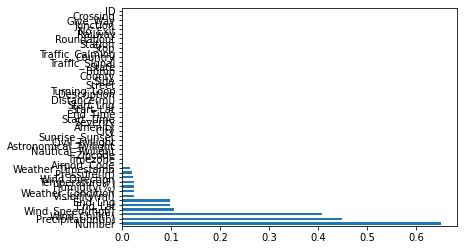

In [15]:
missing_percent.plot(kind='barh')  #Horizontal Bar Plot

Removing the Zeroes Value to get a more clearer Plot.

In [16]:
missing_percent[missing_percent!=0]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

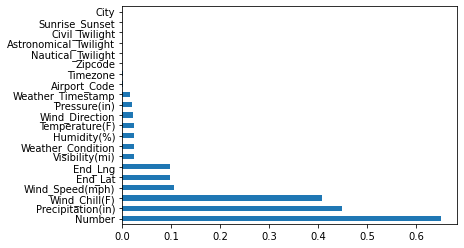

In [17]:
missing_percent[missing_percent!=0].plot(kind='barh')  #Much Better Plot

**Bigger the Bar Line, more the values/percentage of missing values in a particular column**

#Analyse and Visualisation

1. City
2. Start Time
3. Start lat, Start Lng
4. Temperature
5. Weather *Condition*

##City Analysis

In [30]:
cities= df.City.unique()
len(cities)
cities[:200]   #taking 200 cities out of total Unique Cities

array(['Greenville', 'Charlotte', 'Los Gatos', 'Carson City',
       'Fort Lauderdale', 'Rifle', 'Whittier', 'Franklin', 'Valencia',
       'Dover', 'Yonkers', 'Garland', 'Tucson', 'Oakland', 'Houston',
       'Los Angeles', 'Fontana', 'Saint Clair Shores',
       'Hopewell Junction', 'Atlanta', 'Fuquay Varina', 'Daleville',
       'Martinez', 'North Charleston', 'Austin', 'Seal Beach',
       'Cedar Springs', 'Miami', 'Corfu', 'Indianapolis', 'Baton Rouge',
       'Grand Terrace', 'Providence Forge', 'Tempe', 'Pittsford',
       'Pittsburgh', 'Sacramento', 'Latham', 'Homosassa', 'Fort Worth',
       'Redding', 'Downey', 'Minneapolis', 'Lake Worth', 'Grand Rapids',
       'Aldrich', 'Richmond', 'North Highlands', 'Dublin', 'Stafford',
       'Doswell', 'Flint', 'Ballston Spa', 'Baldwin Park',
       'Monroe Township', 'Dallas', 'El Paso', 'Jacksonville',
       'Moreno Valley', 'Summerfield', 'Phoenix', 'San Diego',
       'Capitol Heights', 'East Hartford', 'Lafayette', 'Calpine',
   

In [31]:
#To get the most no of accidents in a city we take the count of unique occurences in a column i.e. city using value_counts()
cities_accident=df.City.value_counts()
cities_accident  

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
               ...  
Jackman            1
Pellston           1
Goose Lake         1
Salamanca          1
Melvin             1
Name: City, Length: 11789, dtype: int64

In [32]:
cities_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

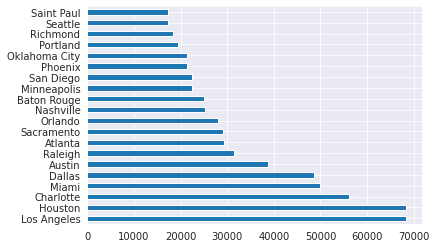

In [33]:
cities_accident[:20].plot(kind='barh')    #Taking top 20 Cities with Accident

**To check the cities with accident and their state**

We analyse the distribution of this Data.

-This can be achioeved by getting the Histogram Plot.

-Import Seaborn Library

In [35]:
import seaborn as sns
sns.set_style("darkgrid")

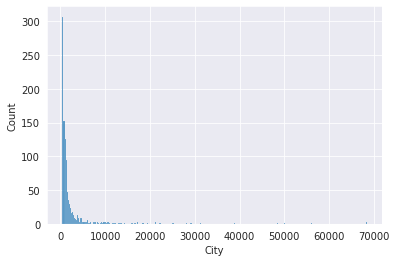

In [34]:
sns.histplot(cities_accident[:1000])     #hiostogram plot

We see the most distribution lies within cities with accident<3000 for total cities in consideration is 1000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


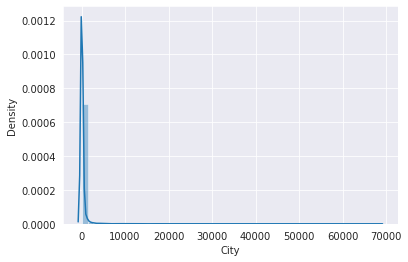

In [36]:
sns.distplot(cities_accident)   #Density Plot

We get a more clearer picture that <2000 accidents has the highest density in the cities.

In [37]:
high_accident = cities_accident[cities_accident>=2000]   #cities with accident number more than 2000
low_accident = cities_accident[cities_accident<2000]

In [38]:
len(high_accident)/len(cities)  #just 223 out of 11000+ and 1.8% of all cities have more than 2000 accidents

0.018914334181509753

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


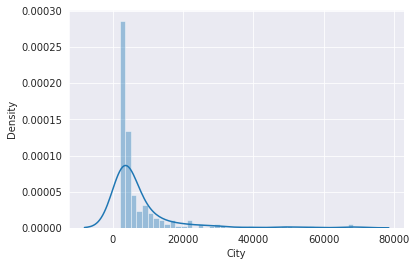

In [39]:
sns.distplot(high_accident)    #Density Plot on >2000 Accident WHich we find is an exponentially Decreasing

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


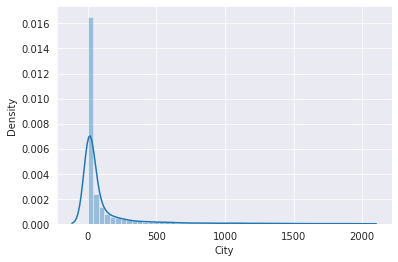

In [40]:
sns.distplot(low_accident)   #Exponential Decrease  <2000 Accidents

We see these takes an exponential Distribution both High Density Accidents and Low accidents. Not much is incurred. SO we take a Logarithmic scale on these plots to get more clear picture.

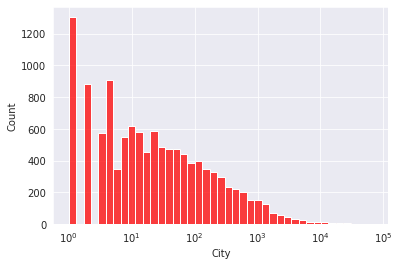

In [41]:
sns.histplot(cities_accident, log_scale=True, color='red')

We see a chunk of single accident datas >1200 in count from the cities. 

- Majority Cities with 2-1000 accidents in count 

- In predictions we can just remove all those with such less columns may be till 1-10 accidents.

##Start Time

In [42]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

To convert/parse to datetime we use **pd.to_datetime(var)**

In [49]:
df.Start_Time= pd.to_datetime(df.Start_Time)   #to time stamp

In [50]:
df.Start_Time[0]


Timestamp('2019-05-21 08:29:55')

In [52]:
df.Start_Time[0].hour     #Return hourof the day from datetime column directly of the particular index


8

In [53]:
df.Start_Time.dt.hour                #Returns hours of the entire Datetime column. (pandas series function)

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

**Plot for Hourly Count of Accidents. We can see after 18 hours the count starts decreasing.**




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


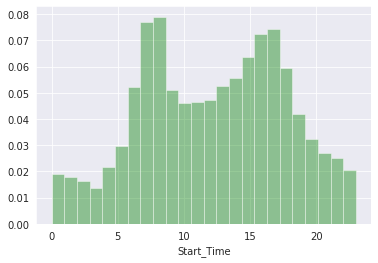

In [59]:
sns.distplot(df.Start_Time.dt.hour, bins=24, color="green", norm_hist=True, kde=False)      #Hourly count of Accidents

- A high percentage of accident occur between 6 am to 9 AM more than (5-8)% per hour.

- Another high time for accidents is between 14 Hours to 18 Hours.   (Probably because Office/colleges end time)

-

**Days count of Accidents**

- Sundays and Saturdays record lesser count of accidents as compared to the weekdays. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


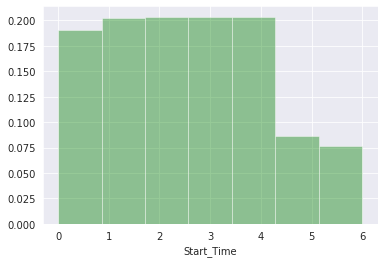

In [78]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, color="green", norm_hist=True, kde=False)

Sunday plot for Hourly Accidents

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


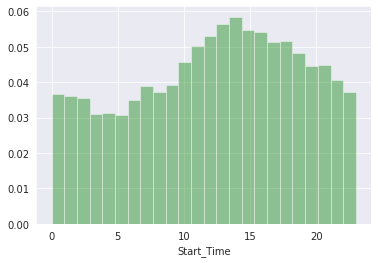

In [89]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==6]
sns.distplot(sundays_start_time.dt.hour, bins=24, color="green", norm_hist=True, kde=False)

Monday Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


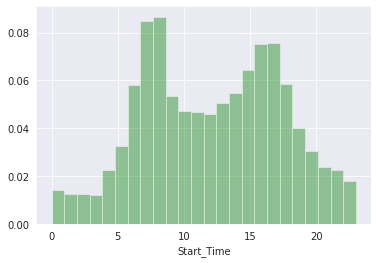

In [90]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==0]
sns.distplot(mondays_start_time.dt.hour, bins=24, color="green", norm_hist=True, kde=False)

Saturday Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


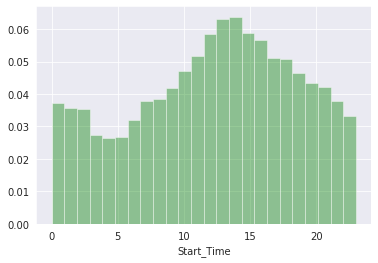

In [91]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==5]
sns.distplot(saturdays_start_time.dt.hour, bins=24, color="green", norm_hist=True, kde=False)

- We can see their is a bell curve/Gaussian Curve for accidents occuring on Sundays and Saturdays. Whereas we observe two Bell curves on Mondays which depict people going for work in morning and returning from work.

- On Saturdays and Sundays the accidents generally occures between 12 Hours and 16 hours. While on workdays it is the general time as we found out earlier for combined days.

**MONTHLY ACCIDENTS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


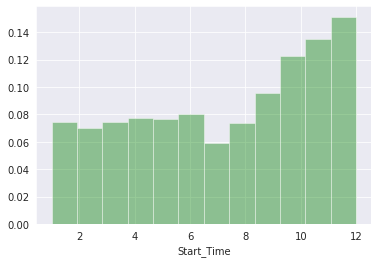

In [93]:
sns.distplot(df.Start_Time.dt.month, bins=12, color="green", norm_hist=True, kde=False)

- We can see around October to December the most number of accidents takes place. The summers are generally with less accidents. 

- **But this needs to be studied**

Checking the yearly datas from 2016-2019

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


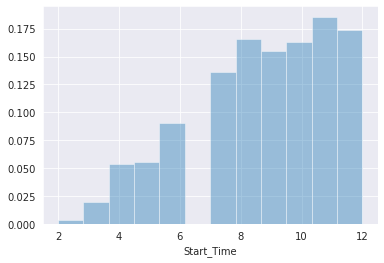

In [104]:
df_2016 = df.Start_Time[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.dt.month, bins=12, kde=False, norm_hist=True)

- The reason behind trend of High accidents on December- November is because of inadequate datas in 2016.

- There might be some issue with the apis with which the sources are taken.

#QUESTIONS we concur

1. Which 5 states has the highest number of accidents.
2. Does Temperature effects the rate of accident
3. Other factors like visibility and wind effects.
4. Among top 100 cities which state do they belong to most frequently?

#Insights and Conclusions

- No Data For City New York

- Around 1.8% cities have less than 2000 Accidents Yearly

- The number of accidents per city decreases exponentially/ has Exponential Distribution

- Over 1200 cities have just 1 Accident reported.